# Logistic Regression Model

<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Karl\AppData\Local\Temp\ipykernel_44556\1169166835.py:38: SyntaxWarning: invalid escape sequence '\d'
  df = load_data('..\data\Student_performance_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 243.1+ KB
               Age  StudyTimeWeekly     Absences     Tutoring  \
count  2392.000000      2392.000000  2392.00

c:\Users\Karl\source\repos\ApexCareSolutions\MLG382_Guided_Project_GroupX\src\preprocess_data.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({False: 0.0, True: 1.0})


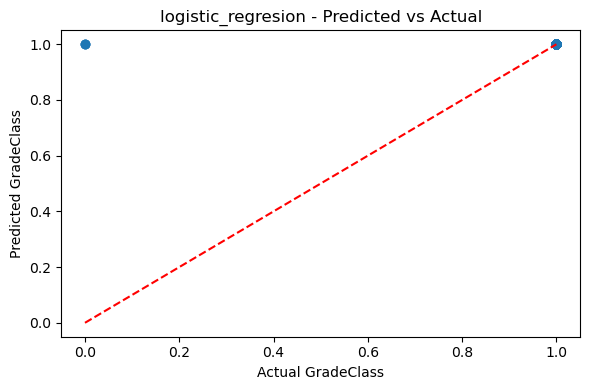

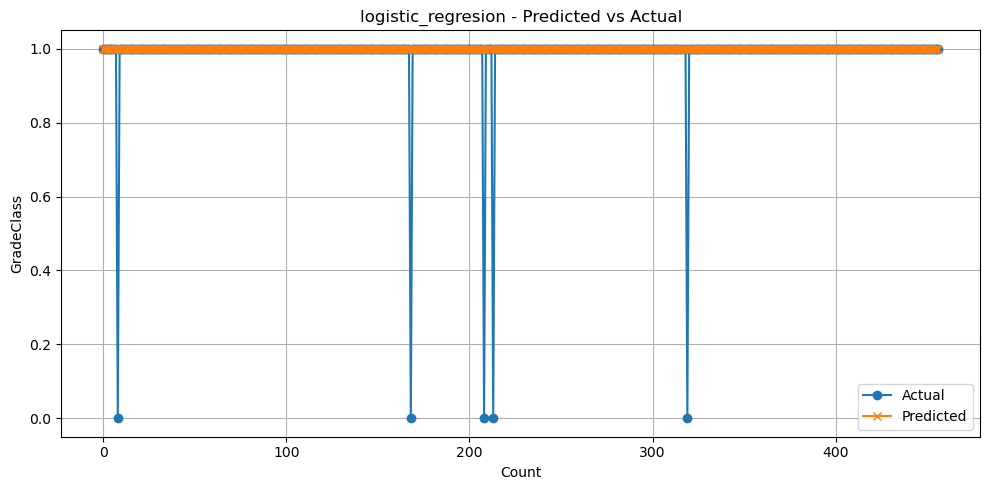

In [1]:
#Importing Required Libraries
import sys
import os

# Import the python libraies from source
#Allows for model to reload without reloading Kernel
import importlib 

#Python files can be used 
sys.path.append(os.path.abspath("../src"))

#prepare_data.py file importing functions
from prepare_data import (
    load_data,
    catagorical_column_transformations,
    feature_engineering
    
)
#preprocess_data.py file importing functions
from preprocess_data import (
    scale_and_encode,
    remove_anomalies,
    get_numeric_columns,
    iterative_outlier_removal,
    make_Onehot
)
#train_models.py file importing functions
from train_models import (
    split_features_target,
    create_train_test_split,
    get_model,
    train_model
)


# Data preparation
# load the data using the load_data function from prepare_data.py
df = load_data('..\data\Student_performance_data.csv')
print(df.describe(df.info()))

# decode the catagorical features
df = catagorical_column_transformations(df)
# perform feature engineering using the feature_engineering function from prepare_data.py
df = feature_engineering(df)
# Preprocessing
# scale and encode the data using the scale_and_encode function from preprocess_data.py
df = scale_and_encode(df)

#print(df.columns.to_list())
# remove anomalies using the remove_anomalies function from preprocess_data.py
#   df = remove_anomalies(df) ~ Removing the anaomalies might break the model

# get the numeric columns using the get_numeric_columns function from preprocess_data.py
numeric_columns = get_numeric_columns(df)
# iterative outlier removal using the iterative_outlier_removal function from preprocess_data.py
df = iterative_outlier_removal(df, numeric_columns)
# make the data one-hot
df = make_Onehot(df)
# Model preparation
X, y = split_features_target(df)

# Ensure the target variable `y` contains discrete classes
# Convert continuous values in `y` into binary classes (e.g., 0 and 1) based on a threshold
threshold = 0.0  # You can adjust this threshold as needed
y = (y > threshold).astype(int)
# create an train test plit
X_train, X_test, Y_train, Y_test = create_train_test_split(X, y)
# reloading and training the deeplearning model
model=get_model('logistic_regresion')
# model training and evaliation
train_model(model, 'logistic_regresion', X_train, X_test, Y_train, Y_test)